# ANOVA - example

We have investigated the moisture content in 5 different types of concrete. Specifically, we are checking if there is a difference in the moisture content in the different types of concrete.

We exposed the samples to moisture for 48 hours before we measured the moisture content. For each concrete type, we
repeated the experiment 6 times.

We will use ANOVA to test the hypothesis that there is no difference between the different samples.

The file [concrete.txt](concrete.txt) contains the experimental data.

In [1]:
# Set up imports:
import pandas as pd  # For loading the data
import numpy as np  # For calculating means and standard deviations
from matplotlib import pyplot as plt  # For plotting
import seaborn as sns  # For plotting
import scipy.stats  # For doing some statistics

sns.set_context("notebook")  # Use a style for notebooks
# Make figures interactive:
%matplotlib inline

C:\Users\joach\AppData\Local\Temp\ipykernel_7312\907699395.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # For loading the data


In [2]:
# Load the data and display it:
data = pd.read_csv("concrete.txt")
data

,Concrete 1,Concrete 2,Concrete 3,Concrete 4,Concrete 5
0,551,595,639,417,563
1,457,580,615,449,631
2,450,508,511,517,522
3,731,583,573,438,613
4,499,633,648,415,656
5,632,517,677,555,679


In [3]:
# Describe the data
data.describe()

,Concrete 1,Concrete 2,Concrete 3,Concrete 4,Concrete 5
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,553.333333,569.333333,610.500000,465.166667,610.666667
std,110.153832,47.986109,59.945809,57.607002,58.783218
min,450.000000,508.000000,511.000000,415.000000,522.000000
25%,467.500000,532.750000,583.500000,422.250000,575.500000
50%,525.000000,581.500000,627.000000,443.500000,622.000000
75%,611.750000,592.000000,645.750000,500.000000,649.750000
max,731.000000,633.000000,677.000000,555.000000,679.000000


We note from the description above that the means for the different concrete types
are different. We also note that the standard deviation is quite large for some of the types.
Are the means different enough to say that there is a difference between the different types?

Let us visually inspect the data:

In [4]:
data_X = data.to_numpy()  # Just get the numbers from the table

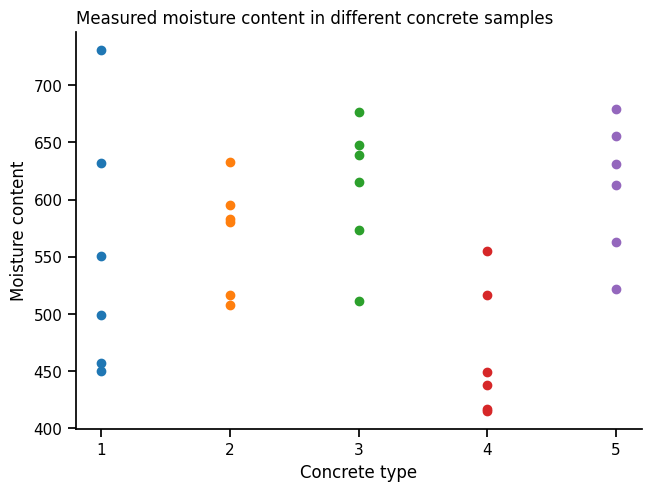

In [5]:
# Plot the different measurements:
fig, ax = plt.subplots(constrained_layout=True)
concrete = [1, 2, 3, 4, 5]
for i, concretei in enumerate(concrete):
    y = data_X[:, i]  # Get column i
    x = [concretei] * len(y)  # Make x = [1, 1, 1,...] or [2, 2, 2, ...] etc.
    ax.scatter(x, y)
ax.set_title(
    "Measured moisture content in different concrete samples", loc="left"
)
ax.set(xlabel="Concrete type", ylabel="Moisture content")
ax.set_xticks(concrete)
sns.despine(fig=fig)

In [6]:
# Let us also show the means with the standard deviation
means = np.mean(data_X, axis=0)  # Mean for columns
print(means)
std = np.std(data_X, axis=0, ddof=1)  # Standard devaition for columns
print(std)

[553.33333333 569.33333333 610.5        465.16666667 610.66666667]
[110.15383183  47.9861091   59.94580886  57.60700189  58.78321756]


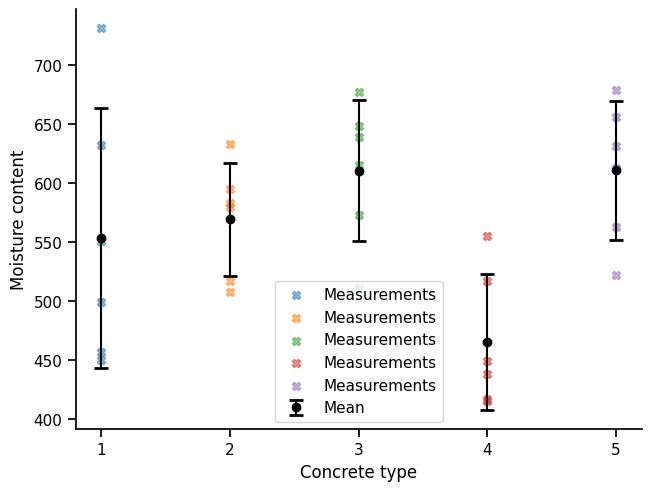

In [7]:
fig, ax = plt.subplots(constrained_layout=True)
ax.errorbar(
    concrete,
    means,
    yerr=std,
    fmt="o",
    label="Mean",
    capsize=5,
    capthick=2,
    color="k",
)
for i, concretei in enumerate(concrete):
    y = data_X[:, i]  # Get column i
    x = [concretei] * len(y)  # Make x = [1, 1, 1,...] or [2, 2, 2, ...] etc.
    ax.scatter(x, y, marker="X", alpha=0.5, label=f"Measurements")
ax.set(xlabel="Concrete type", ylabel="Moisture content")
ax.legend()
ax.set_xticks(concrete)
sns.despine(fig=fig)

To use ANOVA, we calculate the different sum of squares:

* The total sum of squares:
  \begin{equation}SST = \sum_{i=1}^{n} \sum_{j=1}^k (y_{ij} - \overline{y})^2\end{equation}

* The treatment sum of squares:
  \begin{equation}SSA = n \sum_{j=1}^k (\overline{y}_{j} - \overline{y})^2\end{equation}
  
* The error sum of squares:
  \begin{equation} SSE = \sum_{i=1}^n \sum_{j=1}^k (y_{ij} - \overline{y}_j)^2\end{equation}

For these different sums, wehave that: $SST = SSA + SSE$.

In [8]:
# We calculate the different sums here, using loops:
mean = np.mean(data_X)  # Mean of all the data
n, k = data_X.shape  # Get number of rows and columns

# First SST:
SST = 0
for i in range(n):
    for j in range(k):
        SST = SST + (data_X[i, j] - mean) ** 2


print(f"SST: {SST:.2f}")

SST: 209376.80


In [9]:
# Then SSA:
SSA = 0
for j in range(k):
    mean_j = np.mean(data_X[:, j])  # mean of column j
    SSA = SSA + n * (mean_j - mean) ** 2
print(f"SSA: {SSA:.2f}")

SSA: 85356.47


In [10]:
# Then SSE:
SSE = 0
for j in range(k):
    mean_j = np.mean(data_X[:, j])  # mean of column j
    for i in range(n):
        SSE = SSE + (data_X[i, j] - mean_j) ** 2
print(f"SSE: {SSE:.2f}")

SSE: 124020.33


In [11]:
print(f"SSA + SSE: {SSA+SSE:.2f}")
print(f"      SST: {SST:.2f}")

SSA + SSE: 209376.80
      SST: 209376.80


In [12]:
# Alternatively, we can use that NumPy knows how to
# do operations on arrays:
mean = np.mean(data_X)  # Mean of all the data
mean_k = np.mean(data_X, axis=0)  # Mean for columns
n, k = data_X.shape  # Get number of rows and columns
SST = np.sum((data_X - mean) ** 2)
SSA = n * np.sum((means - mean) ** 2)
SSE = np.sum((data_X - means) ** 2)
print(f"SST: {SST:.2f}")
print(f"SSA: {SSA:.2f}")
print(f"SSE: {SSE:.2f}")
print(f"SSA + SSE: {SSA+SSE:.2f}")

SST: 209376.80
SSA: 85356.47
SSE: 124020.33
SSA + SSE: 209376.80


Next, we estimate the variance in two ways:

\begin{equation*}
    s_1^2 = \frac{SSA}{k - 1} \quad (k - 1 \text{ degrees of freedom})
\end{equation*}

and

\begin{equation*}
    s^2 = \frac{SSE}{k(n-1)} \quad (k(n - 1) \text{ degrees of freedom})
\end{equation*}

and we calculate the $f$-statistic: $f = s_1^2/s^2$.

In [13]:
# Estimate the variance using the first formula:
dof_1 = k - 1  # degrees of freedom
s1 = SSA / dof_1

# Estimate the variance using the second formula:
dof_2 = k * (n - 1)  # degrees of freedom
s = SSE / dof_2

# Also calculate the f-statistic:
f = s1 / s
print(f"s1 = {s1}, s = {s}, f = s1/s = {f}")

s1 = 21339.116666666654, s = 4960.8133333333335, f = s1/s = 4.30153590405874


We reject the hypothesis that all the concrete types have the same mean at a significance level of $\alpha$ if

   \begin{equation*}
   f > f_{\alpha}(k-1, k(n-1)).
   \end{equation*}

Thus we need to look up the $f_{\alpha}(k-1, k(n-1))$ value in our case. This can be done with a [table](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3673.htm), or using
the method [scipy.stats.f.ppf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html) from scipy.

In [14]:
alpha = 0.05
f_critical = scipy.stats.f.ppf(1 - alpha, dof_1, dof_2)
print(f"f_critical({dof_1}, {dof_2}) = {f_critical:.4g}")

f_critical(4, 25) = 2.759


In [15]:
print(f"Checking if f > f_critical: {f > f_critical}")
if f > f_critical:
    print("=> We reject the hypothesis - the means are different!")
else:
    print("=> We do not reject the hypothesis - the means are not different!")

Checking if f > f_critical: True
=> We reject the hypothesis - the means are different!


We can also calculate at what $\alpha$ we would reject the hypothesis: 

In [16]:
pval = 1 - scipy.stats.f.cdf(f, dof_1, dof_2)
f_critical2 = scipy.stats.f.ppf(1 - pval, dof_1, dof_2)
print(f"We would reject for α < {pval:.3g}")
print(f"For α = {pval:.3g}: f_critical({dof_1}, {dof_2}) = {f_critical2:.4g}")

We would reject for α < 0.00875
For α = 0.00875: f_critical(4, 25) = 4.302
